# Tarea 4

**Alumno:** Axel Daniel Malváez Flores  
**No.Cta:** 318315126  
**Materia:** Visualización de la Información  

## Actividad 1

Utilice el conjunto de datos spotify.csv para análisis. Los datos contienen métricas numéricas generadas por spotify que miden la capacidad de baile (danceability), el estado de ánimo (mood), la vivacidad (liveness), etc. de las canciones. Los datos también contienen el título y el artista de las canciones.

### • Primero puede importar todos los módulos necesarios (Python) y generar una tabla a analizar.

In [266]:
import pandas as pd
import numpy as np
from numpy.linalg import * 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")

In [267]:
spotify = pd.read_csv('spotify.csv')
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### • Utilice un diagrama de dispersión basado en los valores de valencia (valence) y bailabilidad (danceability) de las canciones. Además, también puede usar la regresión lineal para encontrar su correlación.

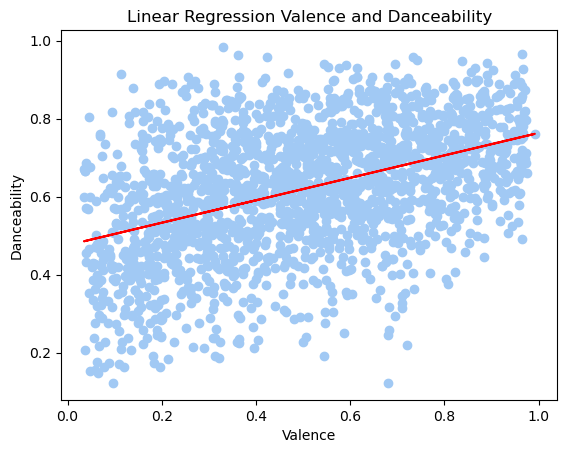

In [268]:
from sklearn.linear_model import LinearRegression

x1 = spotify.loc[:, ['valence']]
x2 = spotify.loc[:, ['danceability']]

lr = LinearRegression()
lr.fit(x1, x2)

x2_predict = lr.predict(x1)

plt.scatter(x1,x2)
plt.plot(x1, x2_predict, color='red')

plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.title('Linear Regression Valence and Danceability')
plt.show()

### • Muestre un gráfico que ilustre la distribución de las canciones en función de sus niveles de energía (energy), así como otro grafico que ilustre el número de canciones encontradas en todos los valores de valencia (valence) y bailabilidad (danceability).

* Energy

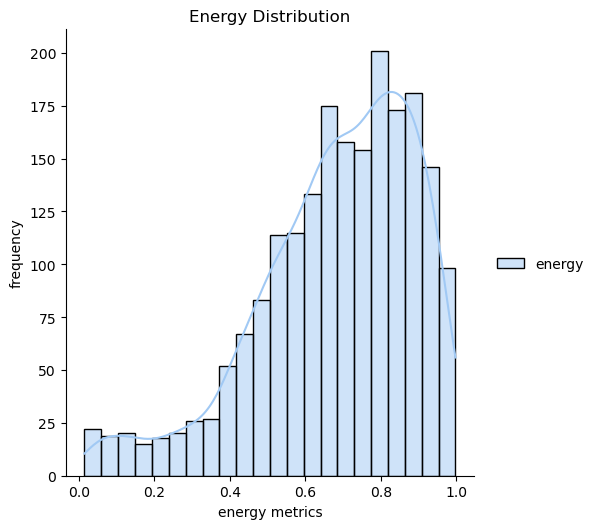

In [269]:
sns.displot(spotify.loc[:,['energy']], kde=True)

plt.title('Energy Distribution')
plt.xlabel('energy metrics')
plt.ylabel('frequency')
plt.show()

* Valence and Danceability

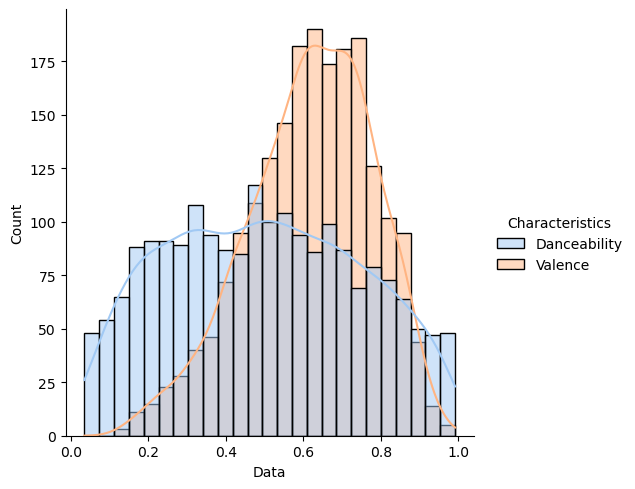

In [270]:
# We generate the data for valence
data1 = spotify.loc[:,['valence']].to_numpy()
data1 = data1.reshape(1, len(data1))[0]

# We generate the data for danceability
data2 = spotify.loc[:,['danceability']].to_numpy()
data2 = data2.reshape(1, len(data2))[0]

# Then we combine the data and label it.
df = pd.DataFrame({'Data': np.concatenate([data1, data2]),
                   'Characteristics': np.concatenate([np.repeat('Danceability', len(data1)),
                                             np.repeat('Valence', len(data2))])})

# Plot histograms
sns.displot(df, x='Data', hue = 'Characteristics', kind='hist', kde=True)

A continuación, genere una lista de rasgos "elegidos" y use el análisis de componentes principales (PCA) para reducir las dimensiones de esa lista. Cuanto menor sea la distancia entre dos canciones, mayores serán las similitudes en sus rasgos.

### 1. Use una lista "elegida" más pequeña y PCA para generar un gráfico de dos dimensiones.

* Tenemos que utilizaremos para aplicar nuestro algoritmo **PCA** aquellas columnas que tengan valores flotantes, así que no nos interesan aquellas columnas que conitenen valores categóricos o nominales, estas columnas son **'Unnamed: 0', 'key', 'mode', 'time_signature', 'target', 'song_title', 'artist'.**

In [271]:
# Libraries we'll nedd
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(spotify.drop(['Unnamed: 0', 'key', 'mode', 'time_signature', 'target', 'song_title', 'artist'], axis=1))

Primero normalizamos nuestros datos con **StandardScaler**, esto hace que nuestros vectores tengan media cero y varianza 1.

In [272]:
dfX_std = pd.DataFrame(X_std)
dfX_std.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.682467,1.332874,-0.508851,-1.177700,-0.407864,-0.166291,-0.454530,3.763084,1.066709,-0.853039
1,0.043897,0.773830,0.983716,-1.534468,-0.465683,-0.346454,-0.881573,-0.147529,1.442323,0.368970
2,-0.589363,1.363932,-0.739362,-1.282352,-0.487200,-0.204897,-0.016586,2.183712,-1.745166,-1.310280
3,1.602040,-0.772860,-0.572137,-1.634363,1.379429,-0.634715,-2.167220,-0.740350,-1.316964,-1.079636
4,-0.029201,0.370075,1.788484,-0.573574,1.386753,1.596735,-1.213155,-0.258753,1.964120,1.647627


In [273]:
# We verify the mean and the variance
mean_vect = np.mean(X_std, axis=0)
var_vect = np.std(X_std, axis=0)

print(f'The mean for the vectors are {mean_vect} and the variance is {var_vect**2}')

The mean for the vectors are [ 2.81821611e-17  4.22732416e-16 -7.04554027e-17  1.05683104e-17
 -2.81821611e-17 -8.45464832e-17  3.10003772e-16  5.63643221e-17
 -2.39548369e-16 -1.26819725e-16] and the variance is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


* Efectivamente las medias tienen a acercarse a 0 y la varianza si es 1.

Ahora calcularemos la matriz de covarianza de nuestras columnas

In [274]:
cov_matrix = (X_std - mean_vect).T @ (X_std - mean_vect)/(len(X_std.shape)-1)

Obtenemos los valores y vectores propios de la matrix

In [275]:
eig_vals, eig_vecs = eig(cov_matrix)

In [276]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

Ordenamos de mayor a menor varianza

In [277]:
# It'll help to get the cumulative variance
suma = sum(eig_vals)
eigen_pair = []

# We divide by the sum of all variances
for pair in eigen_pairs:
    p = pair[0]/suma
    eigen_pair.append((p, pair[1]))

# We sort and have it from big to small
eigen_pair.sort()
eigen_pair.reverse()

contador = 1
for i in eigen_pair:
    print(f'Eigenvalue {contador} : {(i[0])*100 :.3f} % de varianza acumulada')
    print(f'Eigenvector {contador} : {(i[1])} \n')
    contador += 1

Eigenvalue 1 : 27.622 % de varianza acumulada
Eigenvector 1 : [-0.44863474  0.16569424 -0.21557091  0.50698817 -0.26877234  0.12381759
  0.52062271  0.14820535  0.1300384   0.26508921] 

Eigenvalue 2 : 15.045 % de varianza acumulada
Eigenvector 2 : [ 0.13185077  0.60851302 -0.08570107 -0.21858336 -0.24024472 -0.37238132
 -0.13397319  0.08556187 -0.31043714  0.48905796] 

Eigenvalue 3 : 11.961 % de varianza acumulada
Eigenvector 3 : [ 0.27718684 -0.27427386 -0.63129513 -0.21818416 -0.49792613 -0.12126528
  0.01043188  0.23778033  0.23114541 -0.17056146] 

Eigenvalue 4 : 10.290 % de varianza acumulada
Eigenvector 4 : [-0.03663704 -0.18389361 -0.24792598  0.09746296 -0.0475886  -0.35902099
  0.16532858 -0.83760127 -0.18300336  0.0177243 ] 

Eigenvalue 5 : 9.849 % de varianza acumulada
Eigenvector 5 : [ 0.08733954 -0.06132197 -0.09220374 -0.02500738 -0.26201512  0.59791586
  0.04675055 -0.03951997 -0.73522569 -0.09499981] 

Eigenvalue 6 : 7.676 % de varianza acumulada
Eigenvector 6 : [-0.3

Proyectaremos ahora los datos y graficaremos

In [278]:
k = 2  #  Number of dimensions I need
projection_matrix = []
for i in range(k):
    projection_matrix.append(eigen_pair[i][1])
projection_matrix = np.array(projection_matrix)
proj = projection_matrix.T

Finalmente dado que únicamente queremos un gráfico de dos dimensiones lo que haremos será escoger las dos variables que correspondan a tener la mayor parte de la varianza acumulada.

In [279]:
# Data
X = dfX_std.to_numpy()

projected = X @ proj

Entonces la nueva matriz proyectada será

In [280]:
projected

array([[ 0.36232643,  0.81657271],
       [-0.9946906 ,  0.80684875],
       [-0.15404912,  1.37930035],
       ...,
       [ 1.96090472, -0.72027691],
       [ 1.49421999, -1.02303112],
       [ 1.39820276, -1.86077415]])

* Plot ya reducido en dimensionalidad

In [281]:
X = [x[0] for x in projected]
y = [y[1] for y in projected]

Text(0.5, 1.0, 'Data reduced in 2 dimensions using PCA')

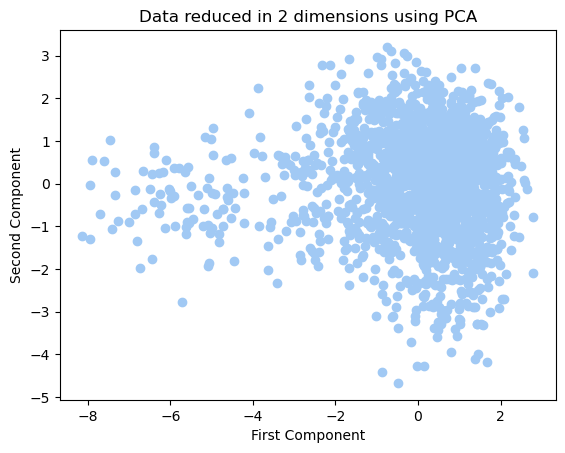

In [282]:
# Plot histograms
plt.scatter(X, y)

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Data reduced in 2 dimensions using PCA')

### 2. Por último, genere un gráfico similar usando t-SNE y otra lista "elegida" en su lugar.

Importamos las librerías que nos hacen falta

In [283]:
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline

Nueva lista elegida

In [284]:
X_new = spotify.drop(['Unnamed: 0', 'key', 'mode', 'time_signature', 'target', 'song_title', 'artist', 'duration_ms', 'energy'], axis=1)
X_new.head()

,acousticness,danceability,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.0102,0.833,0.021900,0.1650,-8.795,0.4310,150.062,0.286
1,0.1990,0.743,0.006110,0.1370,-10.401,0.0794,160.083,0.588
2,0.0344,0.838,0.000234,0.1590,-7.148,0.2890,75.044,0.173
3,0.6040,0.494,0.510000,0.0922,-15.236,0.0261,86.468,0.230
4,0.1800,0.678,0.512000,0.4390,-11.648,0.0694,174.004,0.904


Realizamos la transformación de nuestros datos

In [285]:
pipe = make_pipeline(StandardScaler(), 
                     TSNE(n_components=2))

data_transformed = pipe.fit_transform(X_new)

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [286]:
data_transformed.shape

(2017, 2)

Graficamos de nuevo nuestos datos

In [287]:
X = [x[0] for x in data_transformed]
y = [y[1] for y in data_transformed]

Text(0.5, 1.0, 'Data reduced in 2 dimensions using TSNE')

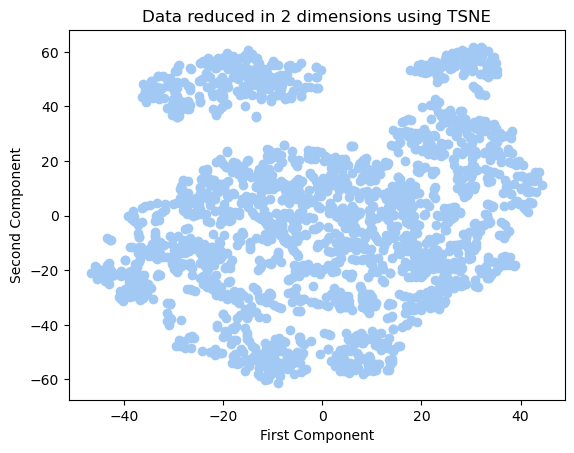

In [288]:
plt.scatter(X, y)

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Data reduced in 2 dimensions using TSNE')

## Actividad 2

Utilice el conjunto de datos cancer.csv para el análisis. Los datos contienen métricas numéricas sobre análisis de cáncer de mama.

In [289]:
cancer = pd.read_csv('cancer.csv')

Eliminamos las columnas que no utilizaremos para nuestras reducciones y clasificaciones

In [290]:
cancer = cancer.drop(['id', 'Unnamed: 32'], axis=1)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### • Muestre una gráfica que indique cuántos casos son benignos (B) y malignos (M).

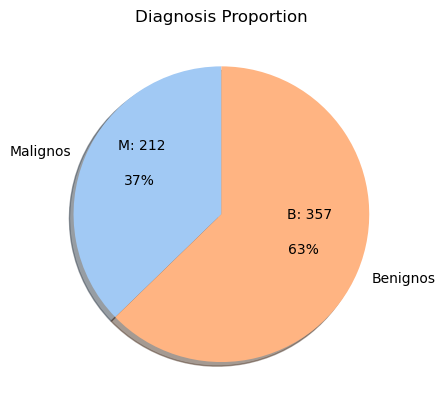

In [291]:
# We obtain the column diagnosis and count the occurrences of each type of
diagnosis = cancer['diagnosis']
counts_diag = [np.count_nonzero(diagnosis == 'M'), np.count_nonzero(diagnosis == 'B')]
labels = ['Malignos', 'Benignos']

# We plot a pie chart
figure, ax = plt.subplots(1,1)
ax.pie(counts_diag, labels=labels, shadow=True, startangle=90, autopct='%1.0f%%')
ax.set_title('Diagnosis Proportion')

# add the count values as text labels M : 212 and B : 357
total_count = sum(counts_diag)
for i, count in enumerate(counts_diag):
    percentage = count / total_count * 100
    if i == 0:
        ax.text(0.22, 0.687, f"M: {count}", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
    else:
        ax.text(0.8, 0.5, f"B: {count}", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)

### • Puede convertir el diagnóstico en un número (0 o 1) para facilitar el trabajo. Por ejemplo, para benignos: 0, malignos: 1.

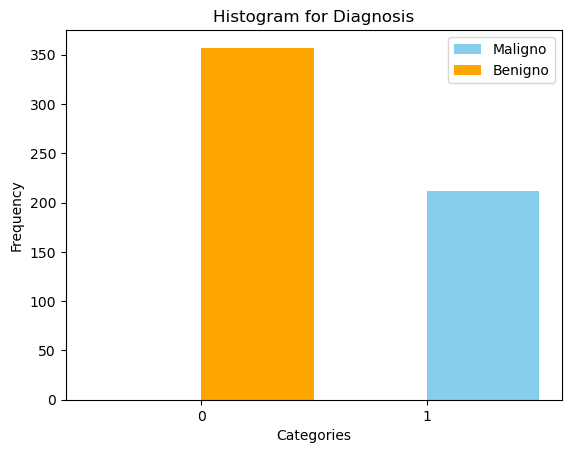

In [292]:
# We map all our values
mapeo = {'M': 1, 'B':0}
diagnosis = [mapeo[item] for item in cancer['diagnosis']]

#plot a histogram
plt.hist([x for x in diagnosis if x == 1], bins=2, label='Maligno', color='skyblue')
plt.hist([x for x in diagnosis if x == 0], bins=2, label='Benigno', color='orange')

plt.xticks(range(0,2))
plt.legend()
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Histogram for Diagnosis')
plt.show()

### • Realice una búsqueda de correlaciones de acuerdo a los datos “mean”, “SE”, “worst”.

Primero podemos obtener aquellas columnas que terminan en "mean", "SE" y "worst" utilizando regex

In [293]:
# Needed library
import re

In [294]:
cols = cancer.columns
mean = []
se = []
worst = []

for col in cols:
    if re.search('mean$', col):
        mean.append(col)
    if re.search('se$', col):
        se.append(col)
    if re.search('worst$', col):
        worst.append(col)

Una vez que ya tenemos las columnas de cada tipo, lo que haremos será graficar el heatmap de cada tipo y ver cuáles de estas están correlacionadas.

* Correlation matrix para las columnas "mean"

Text(0.5, 1.0, 'Correlation Heatmap for Mean Data')

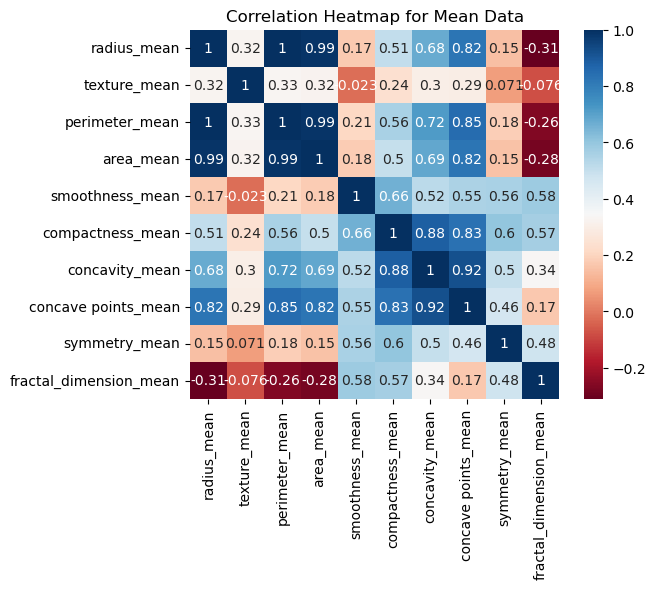

In [295]:
# Data Frame of only mean
cancer_mean = cancer.loc[:, mean]

#Calculate corr matrix
corr_mean = cancer_mean.corr()
sns.heatmap(corr_mean, annot=True,square=True, cmap='RdBu')

plt.title('Correlation Heatmap for Mean Data')

* Correlation matrix para las columnas "SE"

Text(0.5, 1.0, 'Correlation Heatmap for SE Data')

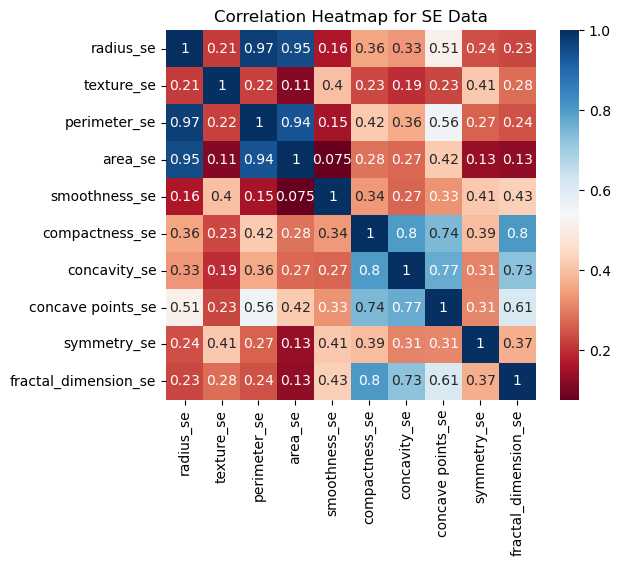

In [296]:
# Data Frame of only se
cancer_se = cancer.loc[:, se]

#Calculate corr matrix
corr_se = cancer_se.corr()
sns.heatmap(corr_se, annot=True,square=True, cmap='RdBu')

plt.title('Correlation Heatmap for SE Data')

* Correlation matrix para las columnas "worst"

Text(0.5, 1.0, 'Correlation Heatmap for Worst Data')

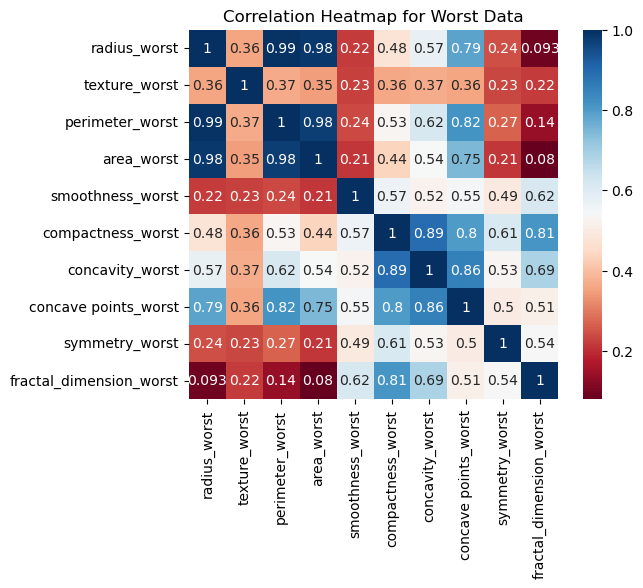

In [297]:
# Data Frame of only worst
cancer_worst = cancer.loc[:, worst]

#Calculate corr matrix
corr_worst = cancer_worst.corr()
sns.heatmap(corr_worst, annot=True,square=True, cmap='RdBu')

plt.title('Correlation Heatmap for Worst Data')

### • También realice busqueda de correlaciones de acuerdo a características.

Text(0.5, 1.0, 'Correlation Heatmap for All Data')

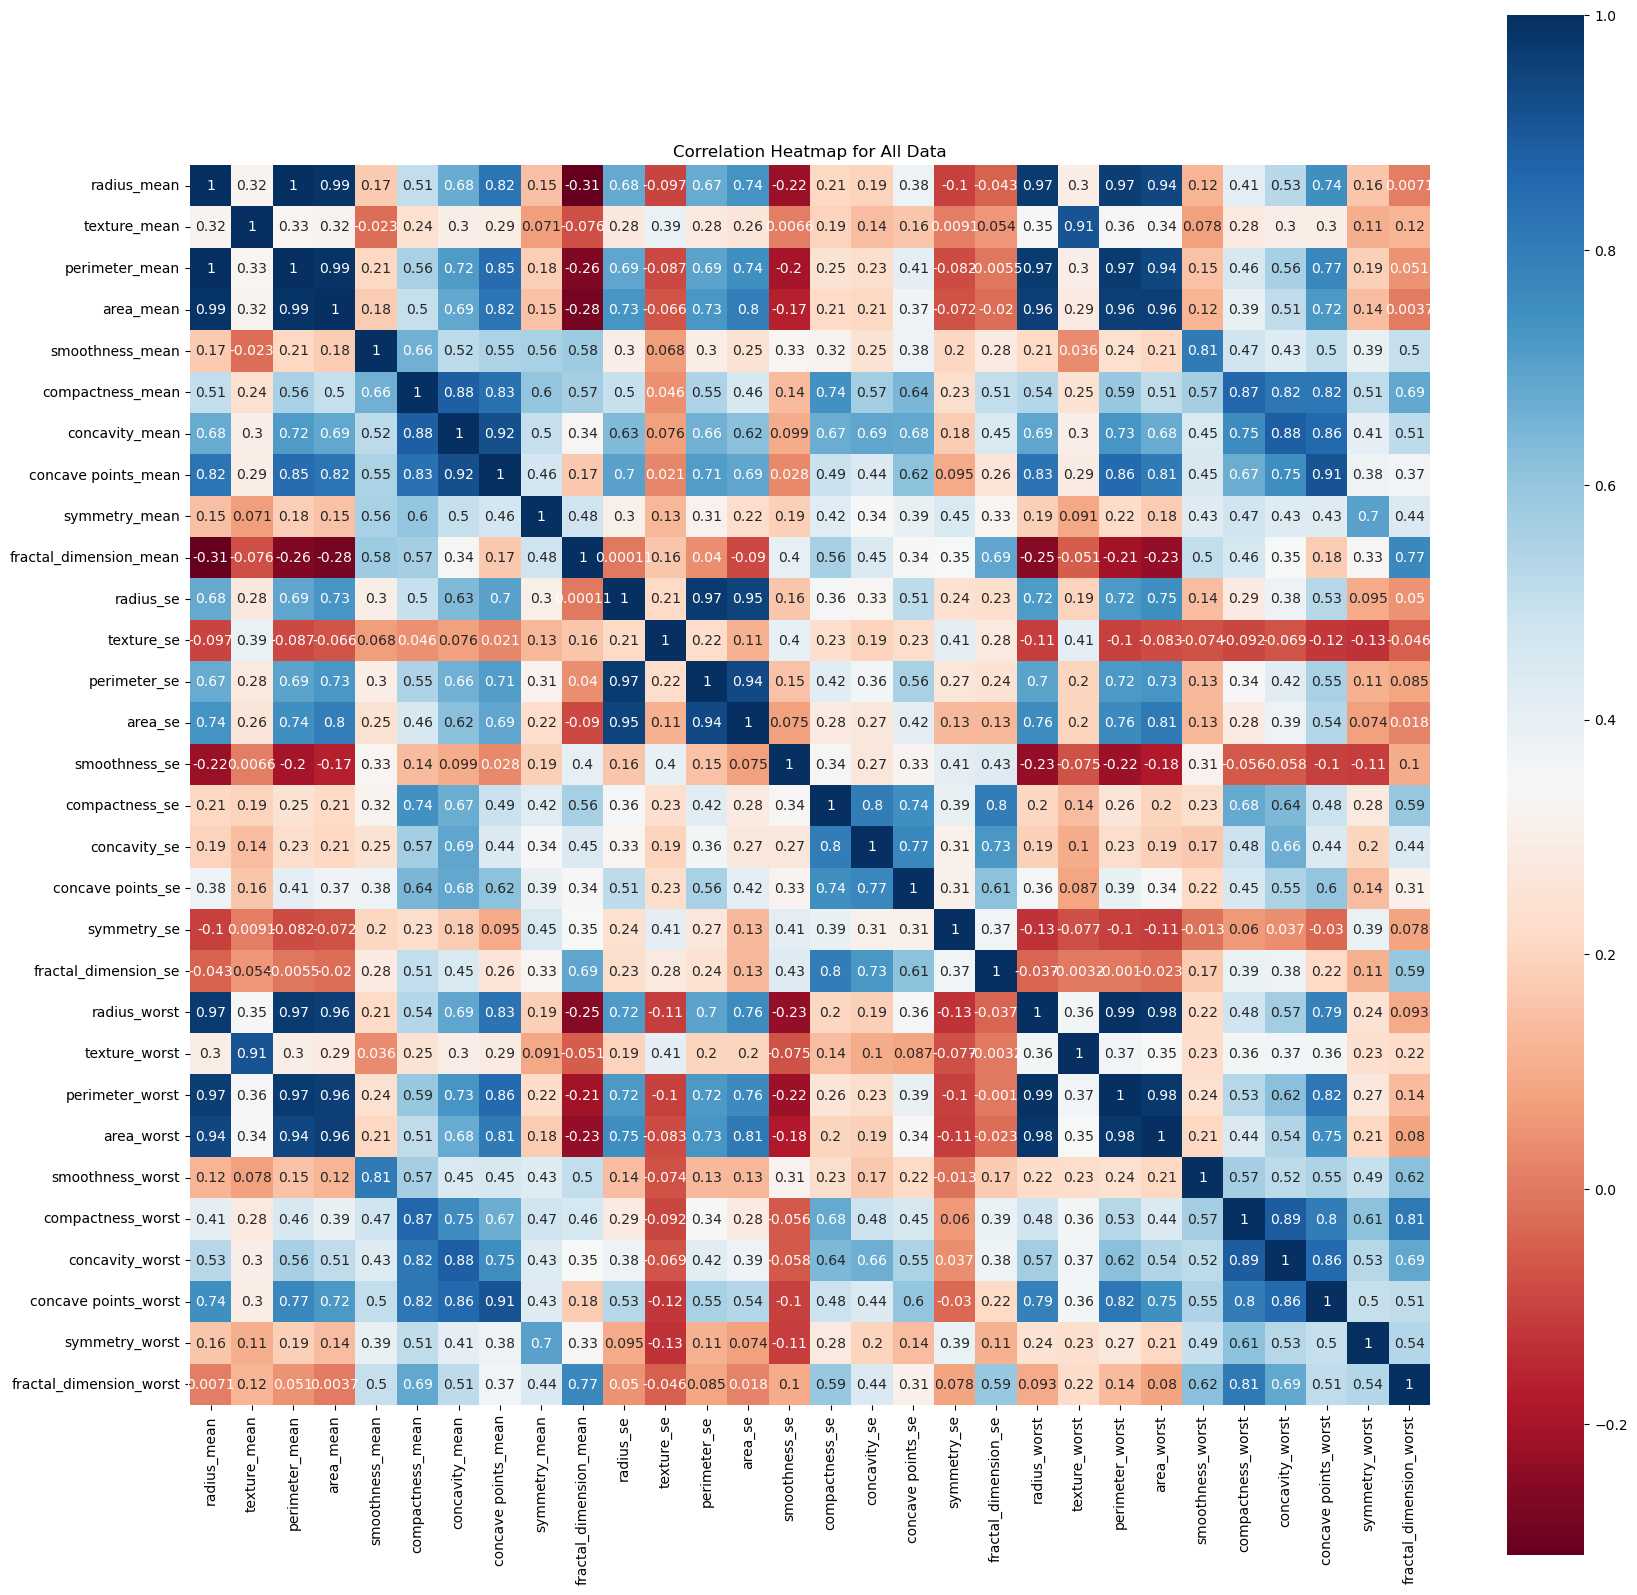

In [298]:
#Calculate corr matrix
cancer_ = cancer.drop('diagnosis', axis=1)
cancer_corr_m = cancer_.corr()

figure = plt.figure(figsize=(20,20))
sns.heatmap(cancer_corr_m, annot=True,square=True, cmap='RdBu')

plt.title('Correlation Heatmap for All Data')

A partir de las correlaciones observadas, intente eliminar alguna de las características para ver si afecta a la clasificación. En caso de no afectar, sería positivo eliminarlas, ya que reduce el número de características a tratar, lo que es beneficioso de cara al coste computacional. Por ejemplo: radio (radio), perímetro (perimeter) y área (area), Concavidad (Concavity), puntos cóncavos (concave points) y compacidad (compactness).

* Muestre un análisis de PCA y t-SNE que indique los casos benignos (B) y malignos (M).

Para facilitar el proceso que hacemos con PCA y con t-SNE usaremos pipelines para ahorrar parte de código, puesto que PCA ya lo hicimos paso a paso.

* 2 Dimensiones

PCA

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


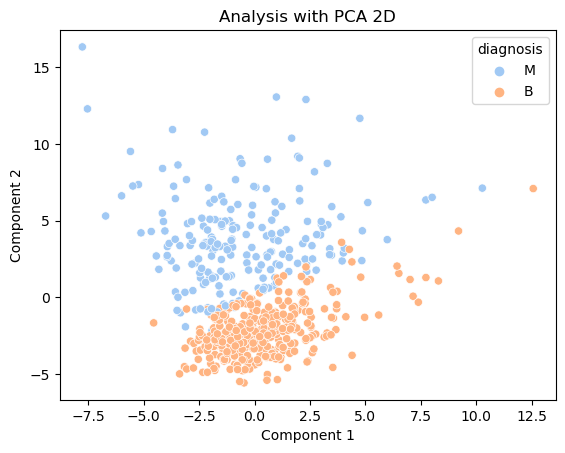

In [299]:
from sklearn.decomposition import PCA

# PCA en dos dimensiones
pipe_pca = make_pipeline(StandardScaler(),
                         PCA(n_components=2))

X_transformed = pipe_pca.fit_transform(cancer_)
sns.scatterplot([x[1] for x in X_transformed], [x[0] for x in X_transformed], hue=cancer['diagnosis'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Analysis with PCA 2D')
plt.show()

t-SNE

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


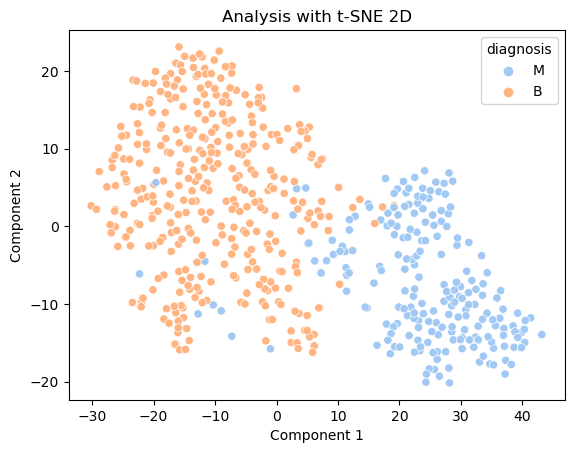

In [300]:
from sklearn.manifold import TSNE

# PCA en dos dimensiones
pipe_tsne = make_pipeline(StandardScaler(),
                         TSNE(n_components=2))

X_transformed = pipe_tsne.fit_transform(cancer_)
sns.scatterplot([x[1] for x in X_transformed], [x[0] for x in X_transformed], hue=cancer['diagnosis'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Analysis with t-SNE 2D')

plt.show()

* 3 Dimensiones

PCA

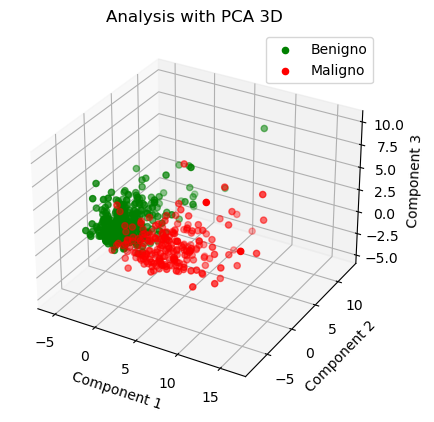

In [301]:
from mpl_toolkits import mplot3d

#PCA en 3 dimensiones
pipe_pca = make_pipeline(StandardScaler(),
                         PCA(n_components=3))

X_transformed = pipe_pca.fit_transform(cancer_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mapeo = {'M': 1, 'B':0}
colors = [mapeo[item] for item in cancer['diagnosis']]
idx_0 = [i for i,d in enumerate(colors) if d==0]
idx_1 = [i for i,d in enumerate(colors) if d==1]

X_proj_0 = [x for i,x in enumerate(X_transformed) if i in idx_0]
X_proj_1 = [x for i,x in enumerate(X_transformed) if i in idx_1]

ax.scatter([x[0] for x in X_proj_0], [x[1] for x in X_proj_0], [x[2] for x in X_proj_0], c='green', label = 'Benigno')
ax.scatter([x[0] for x in X_proj_1], [x[1] for x in X_proj_1], [x[2] for x in X_proj_1], c='red', label = 'Maligno')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.title('Analysis with PCA 3D')
ax.legend()
plt.show()

t-SNE

/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/danielmalvaez/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


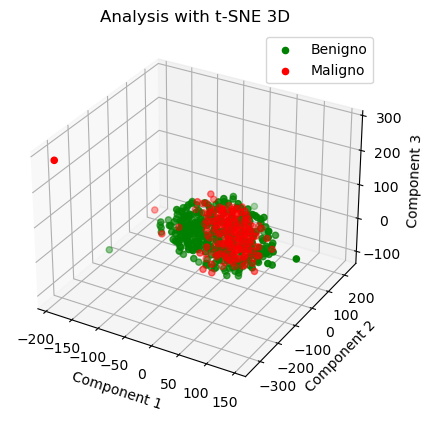

In [302]:
#PCA en 3 dimensiones
pipe_tsne = make_pipeline(StandardScaler(),
                         TSNE(n_components=3))

X_transformed = pipe_tsne.fit_transform(cancer_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mapeo = {'M': 1, 'B':0}
colors = [mapeo[item] for item in cancer['diagnosis']]
idx_0 = [i for i,d in enumerate(colors) if d==0]
idx_1 = [i for i,d in enumerate(colors) if d==1]

X_proj_0 = [x for i,x in enumerate(X_transformed) if i in idx_0]
X_proj_1 = [x for i,x in enumerate(X_transformed) if i in idx_1]

ax.scatter([x[0] for x in X_proj_0], [x[1] for x in X_proj_0], [x[2] for x in X_proj_0], c='green', label = 'Benigno')
ax.scatter([x[0] for x in X_proj_1], [x[1] for x in X_proj_1], [x[2] for x in X_proj_1], c='red', label = 'Maligno')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.title('Analysis with t-SNE 3D')

ax.legend()
plt.show()

## Actividad 3

Considere la siguiente imagen, la cual se puede visualizar en el archivo adjunto: unam.png

### • Muestre una ecualización de histograma de la imagen unam.png para mejorar el contraste, es decir, modificar las intensidades de pixel.

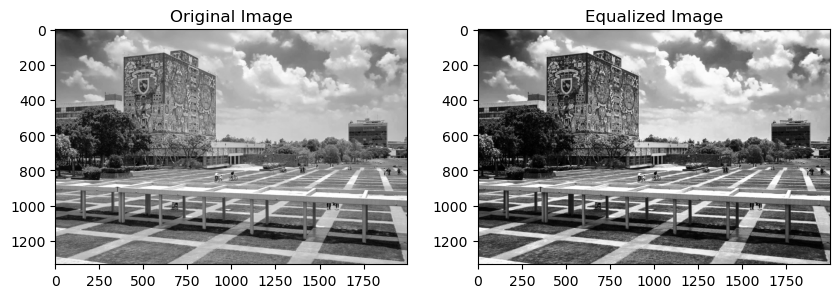

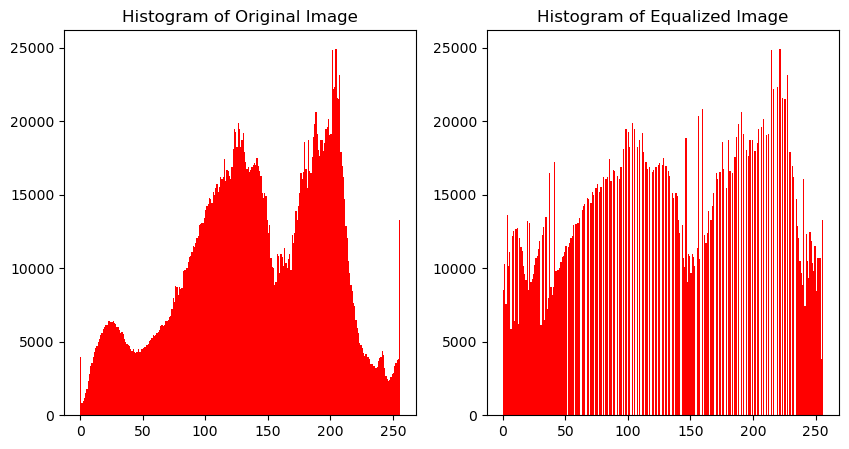

In [303]:
import cv2

# Load the image
img = cv2.imread('unam.png', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Plot the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(eq_img, cmap='gray')
ax2.set_title('Equalized Image')

# Plot the histograms of the original and equalized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(img.flatten(), 256, [0, 256], color='r')
ax1.set_title('Histogram of Original Image')
ax2.hist(eq_img.flatten(), 256, [0, 256], color='r')
ax2.set_title('Histogram of Equalized Image')
plt.show()


### • Describa brevemente si hay diferencias con respecto a la imagen original tomando en cuenta el contraste.

La imagen realmente cambia con respecto a las tonalidades tanto negras como blancas, simplemente veamos el histograma ecualizado y notemos que tenemos gran concentración en los colores que van de 0 a 50, posteriormente hay un poco de recducción de colores y finalmente hay de nuevo una concentración en los negros.

Esto nos hace ver que la imagen tiene negros más oscuros y blancos más blancos, trayendo un efecto de añadidura de sombra.

### • Muestre tres regiones diferentes (zoom) de la imagen unam.png con tres métodos de interpolación distintos (por ejemplo, bilineal, bicubico, gaussiano, etc.).

In [304]:
# Cargamos la imagen
a = cv2.imread('unam.png')
a.shape[:2]

(1333, 2000)

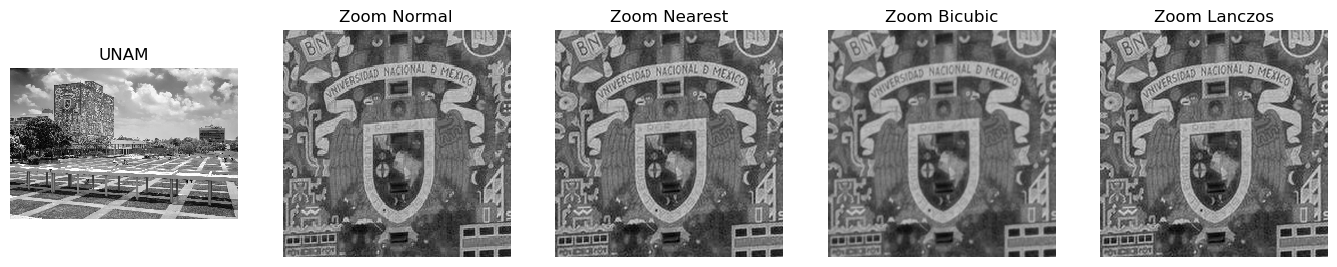

In [305]:
unam_zoom=a[200:400, 400:600]

plt.figure(figsize=(17,5))

plt.subplot(151)
plt.imshow(a,cmap='gray',interpolation='none')
plt.title('UNAM'),plt.axis('off') 

plt.subplot(152)
plt.imshow(unam_zoom,cmap='gray',interpolation='none')
plt.title('Zoom Normal'),plt.axis('off') 

plt.subplot(153)
plt.imshow(unam_zoom,cmap='gray',interpolation='lanczos')
plt.title("Zoom Nearest"),plt.axis('off')

plt.subplot(154)
plt.imshow(unam_zoom,cmap='gray',interpolation='bicubic')
plt.title("Zoom Bicubic"),plt.axis('off')

plt.subplot(155)
plt.imshow(unam_zoom,cmap='gray',interpolation='lanczos')
plt.title("Zoom Lanczos"),plt.axis('off')

plt.show()

### • Para cada region compare la imagen (zoom) sin interpolación con respecto a la imágenes que si están interpoladas y explique brevemente sus observaciones.

* Nearest : El zoom en la foto nearest con respecto al original en el caso de esta imagen parecen ser casi idénticas, sin embargo en nearest parecen estar los bordes más marcados por pixeles que por difuminaciones.

* Bicubic : Esta interpolación deja ver bastante claro que incluso la imagen normal se ve mejor y más nítida que aplicando *Nearest*, pues las letras aparentan tener un filtro medio borroso.

* Lanczos : Este tipo de interpolación nos incrementa las texturas y la nitidez en las imágenes debido a que también parece que incrementa en un factor muy pequeño el ruido de la foto.